In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv("drive/My Drive/train (1).csv")
df.head()

,sequence,label
0,GTATGAGAGGGGGAGCGAGCGCCACTTCCCTGGAGGTGGAGGACAT...,0
1,AAACGTCAGCTCGCTTGCACTCATTCCATTTTGGACTTTGTGTAAA...,0
2,AGGAAGGTCCGACCCCCCCCCCAGCCCCGGGCCAGTCGGCGTCCCC...,0
3,AAAGCGTTGCGCACTTTTCCGCCATAGCGCCCGTTAGCCCCAAACA...,0
4,TGACACACCAGACCAACCTGAGGCTGCCAGCTCTCCCACCTCAGCT...,0


In [ ]:
import pandas as pd

# Load your dataset
train = pd.read_csv('drive/My Drive/train (1).csv')

print(train)

                                               sequence  label
0     GTATGAGAGGGGGAGCGAGCGCCACTTCCCTGGAGGTGGAGGACAT...      0
1     AAACGTCAGCTCGCTTGCACTCATTCCATTTTGGACTTTGTGTAAA...      0
2     AGGAAGGTCCGACCCCCCCCCCAGCCCCGGGCCAGTCGGCGTCCCC...      0
3     AAAGCGTTGCGCACTTTTCCGCCATAGCGCCCGTTAGCCCCAAACA...      0
4     TGACACACCAGACCAACCTGAGGCTGCCAGCTCTCCCACCTCAGCT...      0
...                                                 ...    ...
6473  GGCAATTCGAGTGTGAAGGCAGGGAGGCGGGGCCCGAGCCACGTAT...      0
6474  GGCCTTGTAGTTCGCTGTTGGTCTCTTCTGGGTATCCTCGACACGA...      1
6475  GACGACTCTGTCGCTGAGCAGTGGCCTCTCGTACGCTCGGCACCAC...      0
6476  CGGCTGGAGCGATGCCGTGTGTGGGGAGCGCTCGCGGATGTCGGAG...      0
6477  ACGCGCCTAAAACGCTGGCTTCGGCGGAAAGCCGCACCCCTCGGGG...      0

[6478 rows x 2 columns]


In [ ]:
# Assuming your DataFrame is named 'df'
label_counts = train['label'].value_counts()

print(label_counts)

1    3249
0    3229
Name: label, dtype: int64


In [ ]:
train = train.drop_duplicates()

In [ ]:
#find null values/missing data

null_counts=train.isnull().sum()


In [ ]:
print(null_counts)

sequence    0
label       0
dtype: int64


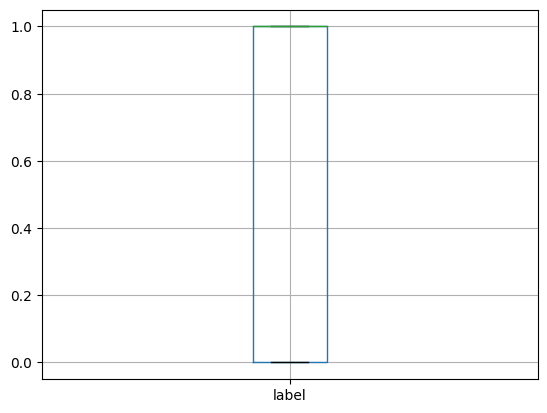

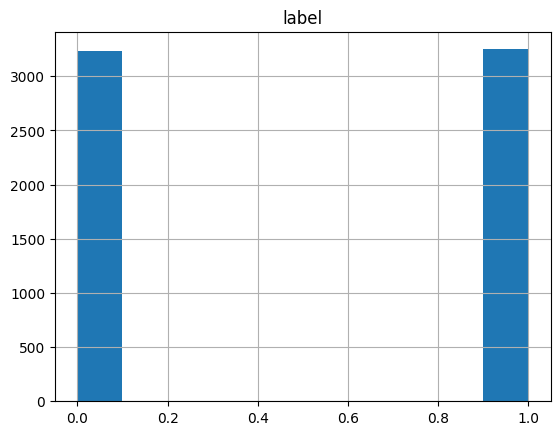

In [ ]:
#Visualize data (Box plot and histogram)

import matplotlib.pyplot as plt
train.boxplot()
plt.show()

train.hist()
plt.show()


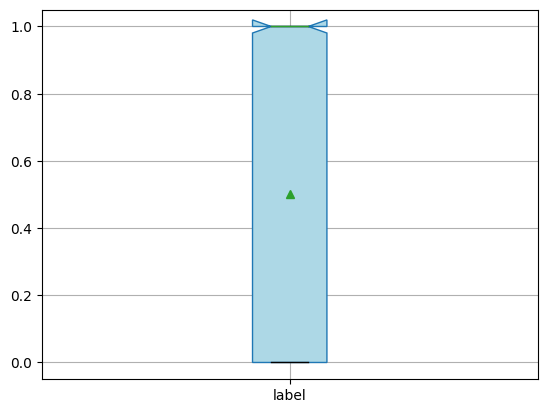

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'full' is your DataFrame and 'column_name' is the column you want to plot
box = train.boxplot(column='label', notch=True, patch_artist=True, showmeans=True)

colors = ['lightblue', 'pink']
for patch, color in zip(box.patches, colors):
      patch.set_facecolor(color)

plt.show()



In [ ]:
# handling outliers
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

outliers = train[((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers)


Empty DataFrame
Columns: [sequence, label]
Index: []


<ipython-input-10-cbd65e3ae7fa>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = train.quantile(0.25)
<ipython-input-10-cbd65e3ae7fa>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = train.quantile(0.75)
<ipython-input-10-cbd65e3ae7fa>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = train[((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]


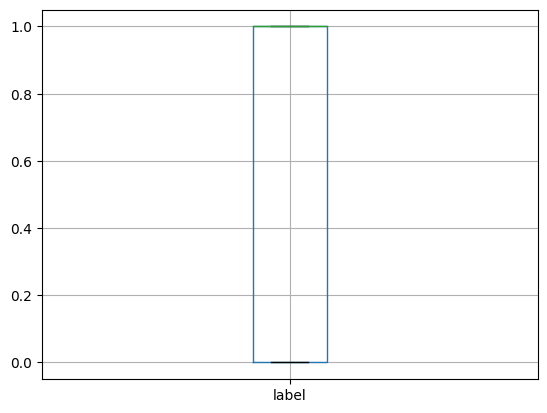

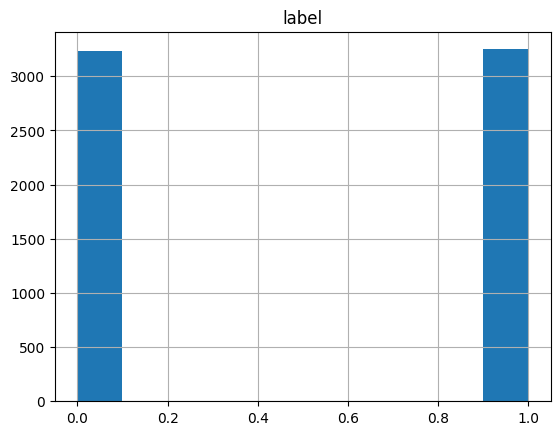

In [ ]:
#Visualize data

train.boxplot()
plt.show()

train.hist()
plt.show()


In [ ]:
#removing spaces in dataset

train['sequence']=train['sequence'].str.replace(' ','')
print(train)
train2=train.copy()


                                               sequence  label
0     GTATGAGAGGGGGAGCGAGCGCCACTTCCCTGGAGGTGGAGGACAT...      0
1     AAACGTCAGCTCGCTTGCACTCATTCCATTTTGGACTTTGTGTAAA...      0
2     AGGAAGGTCCGACCCCCCCCCCAGCCCCGGGCCAGTCGGCGTCCCC...      0
3     AAAGCGTTGCGCACTTTTCCGCCATAGCGCCCGTTAGCCCCAAACA...      0
4     TGACACACCAGACCAACCTGAGGCTGCCAGCTCTCCCACCTCAGCT...      0
...                                                 ...    ...
6473  GGCAATTCGAGTGTGAAGGCAGGGAGGCGGGGCCCGAGCCACGTAT...      0
6474  GGCCTTGTAGTTCGCTGTTGGTCTCTTCTGGGTATCCTCGACACGA...      1
6475  GACGACTCTGTCGCTGAGCAGTGGCCTCTCGTACGCTCGGCACCAC...      0
6476  CGGCTGGAGCGATGCCGTGTGTGGGGAGCGCTCGCGGATGTCGGAG...      0
6477  ACGCGCCTAAAACGCTGGCTTCGGCGGAAAGCCGCACCCCTCGGGG...      0

[6478 rows x 2 columns]


In [ ]:
# Save the 'sequence' column of the DataFrame to a text file
train.to_csv('train.txt', index=False)

In [ ]:
# Using 'full.txt' as input to SentencePiece trainer
!pip install sentencepiece
import sentencepiece as spm
params = {
    "input": "train.txt",  # Path to the input file
    "model_prefix": "m",  # Prefix for the output model file
    "vocab_size": 4090,  # Size of the vocabulary
    "model_type": "bpe"  # Type of the model to train
}

# Train the model
spm.SentencePieceTrainer.train(**params)


In [ ]:
# Load the trained model
model = spm.SentencePieceProcessor()
model.load("m.model")

# Encode a sentence using the model
encoded = model.encode("This is a sentence.")
print(encoded)


[115, 0, 4087, 0, 4087, 0, 4087, 0]


In [ ]:
# Load the trained model
model = spm.SentencePieceProcessor()
model.load("m.model")

# Encode a sentence using the model
encoded = model.encode("train.txt")
print(encoded)

[4087, 0]


In [ ]:
import pandas as pd
import sentencepiece as spm

# Load your dataset
train = pd.read_csv('train.txt')

# Load the trained model
sp = spm.SentencePieceProcessor(model_file="m.model")

print(sp)

<sentencepiece.SentencePieceProcessor; proxy of <Swig Object of type 'sentencepiece::SentencePieceProcessor *' at 0x7836fb4ec0f0> >


In [ ]:
# Apply BPE to each sequence in the dataset and store the results in a new column 'tokenized_sequence'
train['tokenized_sequence'] = train['sequence'].apply(lambda x: sp.encode(x))

train.to_csv('train_with_tokenized_sequences.txt', index=False)

print(train)

                                               sequence  label  \
0     GTATGAGAGGGGGAGCGAGCGCCACTTCCCTGGAGGTGGAGGACAT...      0   
1     AAACGTCAGCTCGCTTGCACTCATTCCATTTTGGACTTTGTGTAAA...      0   
2     AGGAAGGTCCGACCCCCCCCCCAGCCCCGGGCCAGTCGGCGTCCCC...      0   
3     AAAGCGTTGCGCACTTTTCCGCCATAGCGCCCGTTAGCCCCAAACA...      0   
4     TGACACACCAGACCAACCTGAGGCTGCCAGCTCTCCCACCTCAGCT...      0   
...                                                 ...    ...   
6473  GGCAATTCGAGTGTGAAGGCAGGGAGGCGGGGCCCGAGCCACGTAT...      0   
6474  GGCCTTGTAGTTCGCTGTTGGTCTCTTCTGGGTATCCTCGACACGA...      1   
6475  GACGACTCTGTCGCTGAGCAGTGGCCTCTCGTACGCTCGGCACCAC...      0   
6476  CGGCTGGAGCGATGCCGTGTGTGGGGAGCGCTCGCGGATGTCGGAG...      0   
6477  ACGCGCCTAAAACGCTGGCTTCGGCGGAAAGCCGCACCCCTCGGGG...      0   

                                     tokenized_sequence  
0     [345, 943, 192, 70, 375, 38, 2388, 483, 50, 18...  
1     [1981, 17, 183, 88, 74, 204, 15, 311, 50, 491,...  
2     [1043, 668, 76, 220, 220, 2

In [ ]:
# Checking token length of each sequence
for index, tokenized_sequence in enumerate(train['tokenized_sequence']):
    print(f"Length of tokenized_sequence in row {index+1}: {len(tokenized_sequence)}")

Streaming output truncated to the last 5000 lines.
Length of tokenized_sequence in row 1479: 20
Length of tokenized_sequence in row 1480: 19
Length of tokenized_sequence in row 1481: 21
Length of tokenized_sequence in row 1482: 20
Length of tokenized_sequence in row 1483: 21
Length of tokenized_sequence in row 1484: 19
Length of tokenized_sequence in row 1485: 21
Length of tokenized_sequence in row 1486: 21
Length of tokenized_sequence in row 1487: 20
Length of tokenized_sequence in row 1488: 22
Length of tokenized_sequence in row 1489: 20
Length of tokenized_sequence in row 1490: 20
Length of tokenized_sequence in row 1491: 21
Length of tokenized_sequence in row 1492: 21
Length of tokenized_sequence in row 1493: 23
Length of tokenized_sequence in row 1494: 19
Length of tokenized_sequence in row 1495: 22
Length of tokenized_sequence in row 1496: 20
Length of tokenized_sequence in row 1497: 19
Length of tokenized_sequence in row 1498: 21
Length of tokenized_sequence in row 1499: 20
Leng

In [ ]:
# Find the length of the longest sequence
max_length = max(len(sequence) for sequence in train['tokenized_sequence'])

# Pad all sequences to have the same length as the longest sequence
padded_sequences = [sequence + [0]*(max_length - len(sequence)) for sequence in train['tokenized_sequence']]

# Convert the padded sequences to a DataFrame
padded_df = pd.DataFrame(padded_sequences)

# Apply Min-Max normalization to each sequence
normalized_sequences = padded_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# Convert the normalized sequences back to list
normalized_sequences_list = normalized_sequences.values.tolist()

# Create a new DataFrame for the normalized sequences
normalized_df = train.copy()
normalized_df['tokenized_sequence'] = normalized_sequences_list

In [ ]:
# Iterate over the first 5 sequences in the 'tokenized_sequence' column
for i, sequence in enumerate(normalized_df['tokenized_sequence']):
    print(f"Sequence at index {i}: {sequence}")
    if i == 4:
        break

Sequence at index 0: [0.09385201305767138, 0.25652883569096846, 0.05223068552774755, 0.019042437431991296, 0.10201305767138194, 0.010337323177366704, 0.6496191512513602, 0.13139281828073993, 0.013601741022850925, 0.5048966267682263, 0.04869423286180631, 0.009521218715995648, 0.008705114254624592, 0.041893362350380846, 0.411860718171926, 1.0, 0.10310119695321002, 0.061207834602829164, 0.9888465723612623, 0.001632208922742111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Sequence at index 1: [0.6082284310715382, 0.0052195271722443965, 0.05618667485416027, 0.027018728891618052, 0.022720294749769727, 0.06263432606693276, 0.00460546515198035, 0.09548664415105926, 0.015351550506601168, 0.15075222597482346, 0.003070310101320233, 0.6720908811789991, 0.029782007982806263, 0.06263432606693276, 0.711083819465766, 0.03500153515505066, 0.8507829290758366, 0.01197420939514891, 0.1590420632483881, 1.0, 0.8888547743322075, 0.06846791525944121, 0.0, 0.0, 0.0, 0.0]
Sequence at index 2: [0.36265646731571627, 0.23226703

In [ ]:
import pandas as pd

correlation_matrix = normalized_df[['label', 'tokenized_sequence']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
       label
label    1.0


<ipython-input-22-a6b653251040>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = normalized_df[['label', 'tokenized_sequence']].corr()


In [ ]:
new_df = normalized_df[['sequence', 'label', 'tokenized_sequence']]

print(new_df)

                                               sequence  label  \
0     GTATGAGAGGGGGAGCGAGCGCCACTTCCCTGGAGGTGGAGGACAT...      0   
1     AAACGTCAGCTCGCTTGCACTCATTCCATTTTGGACTTTGTGTAAA...      0   
2     AGGAAGGTCCGACCCCCCCCCCAGCCCCGGGCCAGTCGGCGTCCCC...      0   
3     AAAGCGTTGCGCACTTTTCCGCCATAGCGCCCGTTAGCCCCAAACA...      0   
4     TGACACACCAGACCAACCTGAGGCTGCCAGCTCTCCCACCTCAGCT...      0   
...                                                 ...    ...   
6473  GGCAATTCGAGTGTGAAGGCAGGGAGGCGGGGCCCGAGCCACGTAT...      0   
6474  GGCCTTGTAGTTCGCTGTTGGTCTCTTCTGGGTATCCTCGACACGA...      1   
6475  GACGACTCTGTCGCTGAGCAGTGGCCTCTCGTACGCTCGGCACCAC...      0   
6476  CGGCTGGAGCGATGCCGTGTGTGGGGAGCGCTCGCGGATGTCGGAG...      0   
6477  ACGCGCCTAAAACGCTGGCTTCGGCGGAAAGCCGCACCCCTCGGGG...      0   

                                     tokenized_sequence  
0     [0.09385201305767138, 0.25652883569096846, 0.0...  
1     [0.6082284310715382, 0.0052195271722443965, 0....  
2     [0.36265646731571627, 0.232

In [ ]:
import pandas as pd

new_df['tokenized_sequence'].apply(lambda x: pd.Series(x)).add_prefix('token_')

,token_0,token_1,token_2,token_3,token_4,token_5,token_6,token_7,token_8,token_9,...,token_16,token_17,token_18,token_19,token_20,token_21,token_22,token_23,token_24,token_25
0,0.093852,0.256529,0.052231,0.019042,0.102013,0.010337,0.649619,0.131393,0.013602,0.504897,...,0.103101,0.061208,0.988847,0.001632,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.608228,0.005220,0.056187,0.027019,0.022720,0.062634,0.004605,0.095487,0.015352,0.150752,...,0.850783,0.011974,0.159042,1.000000,0.888855,0.068468,0.0,0.0,0.0,0.0
2,0.362656,0.232267,0.026426,0.076495,0.076495,0.079624,0.030250,1.000000,0.289638,0.020862,...,0.004868,0.179068,0.747914,0.095967,0.000000,0.000000,0.0,0.0,0.0,0.0
3,1.000000,0.049425,0.005872,0.127722,0.168339,0.068999,0.291656,0.005872,0.056031,0.605579,...,0.025447,0.239051,0.054074,0.167849,0.999266,0.000000,0.0,0.0,0.0,0.0
4,0.040593,0.097776,0.007060,0.050477,1.000000,0.301447,0.064596,0.009531,0.102012,0.081186,...,0.008825,0.399223,0.032474,0.012707,0.113307,0.013766,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6473,0.098735,0.126788,0.166117,0.017052,0.011826,0.035754,0.003300,0.136964,0.001100,0.044554,...,1.000000,0.033278,0.288504,0.298405,0.020077,0.001650,0.0,0.0,0.0,0.0
6474,0.235918,0.041930,0.065168,0.232129,0.014903,0.129831,0.018186,0.256125,0.004799,0.037888,...,0.013892,0.151301,0.061379,0.005810,0.000000,0.000000,0.0,0.0,0.0,0.0
6475,0.128089,0.259633,0.050492,0.057135,0.369386,0.014616,0.057933,0.412437,0.064842,0.003455,...,1.000000,0.469041,0.052086,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6476,0.011998,0.235064,0.131978,0.003428,0.495103,0.020568,0.655975,0.030852,0.004163,0.031587,...,0.079334,0.161117,0.032566,0.019833,1.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
new_df['tokenized_sequence'].apply(lambda x: pd.Series(x)).add_prefix('token_').to_csv("tokenized_df.csv")

In [ ]:
tokenized=pd.read_csv("tokenized_df.csv")
print(tokenized)

      Unnamed: 0   token_0   token_1   token_2   token_3   token_4   token_5  \
0              0  0.093852  0.256529  0.052231  0.019042  0.102013  0.010337   
1              1  0.608228  0.005220  0.056187  0.027019  0.022720  0.062634   
2              2  0.362656  0.232267  0.026426  0.076495  0.076495  0.079624   
3              3  1.000000  0.049425  0.005872  0.127722  0.168339  0.068999   
4              4  0.040593  0.097776  0.007060  0.050477  1.000000  0.301447   
...          ...       ...       ...       ...       ...       ...       ...   
6473        6473  0.098735  0.126788  0.166117  0.017052  0.011826  0.035754   
6474        6474  0.235918  0.041930  0.065168  0.232129  0.014903  0.129831   
6475        6475  0.128089  0.259633  0.050492  0.057135  0.369386  0.014616   
6476        6476  0.011998  0.235064  0.131978  0.003428  0.495103  0.020568   
6477        6477  0.523482  0.019473  0.076460  0.141753  0.013173  0.003436   

       token_6   token_7   token_8  ...

In [ ]:
tokenized['label'] = new_df['label'].astype(int)
tokenized.to_csv("tokenized_df.csv")

In [ ]:
tokenized['sequence'] = new_df['sequence']
tokenized.to_csv("tokenized_df.csv")

In [ ]:
dataset=pd.read_csv("drive/My Drive/tokenized_df.csv")
print(dataset)

                                               sequence  label   token_0  \
0     GTATGAGAGGGGGAGCGAGCGCCACTTCCCTGGAGGTGGAGGACAT...      0  0.093852   
1     AAACGTCAGCTCGCTTGCACTCATTCCATTTTGGACTTTGTGTAAA...      0  0.608228   
2     AGGAAGGTCCGACCCCCCCCCCAGCCCCGGGCCAGTCGGCGTCCCC...      0  0.362656   
3     AAAGCGTTGCGCACTTTTCCGCCATAGCGCCCGTTAGCCCCAAACA...      0  1.000000   
4     TGACACACCAGACCAACCTGAGGCTGCCAGCTCTCCCACCTCAGCT...      0  0.040593   
...                                                 ...    ...       ...   
6473  GGCAATTCGAGTGTGAAGGCAGGGAGGCGGGGCCCGAGCCACGTAT...      0  0.098735   
6474  GGCCTTGTAGTTCGCTGTTGGTCTCTTCTGGGTATCCTCGACACGA...      1  0.235918   
6475  GACGACTCTGTCGCTGAGCAGTGGCCTCTCGTACGCTCGGCACCAC...      0  0.128089   
6476  CGGCTGGAGCGATGCCGTGTGTGGGGAGCGCTCGCGGATGTCGGAG...      0  0.011998   
6477  ACGCGCCTAAAACGCTGGCTTCGGCGGAAAGCCGCACCCCTCGGGG...      0  0.523482   

       token_1   token_2   token_3   token_4   token_5   token_6   token_7  \
0     0.2

In [ ]:
dataset1=pd.read_csv("drive/My Drive/tokenized_df - Copy.csv")
print(dataset1)

      label   token_0   token_1   token_2   token_3   token_4   token_5  \
0         0  0.093852  0.256529  0.052231  0.019042  0.102013  0.010337   
1         0  0.608228  0.005220  0.056187  0.027019  0.022720  0.062634   
2         0  0.362656  0.232267  0.026426  0.076495  0.076495  0.079624   
3         0  1.000000  0.049425  0.005872  0.127722  0.168339  0.068999   
4         0  0.040593  0.097776  0.007060  0.050477  1.000000  0.301447   
...     ...       ...       ...       ...       ...       ...       ...   
6473      0  0.098735  0.126788  0.166117  0.017052  0.011826  0.035754   
6474      1  0.235918  0.041930  0.065168  0.232129  0.014903  0.129831   
6475      0  0.128089  0.259633  0.050492  0.057135  0.369386  0.014616   
6476      0  0.011998  0.235064  0.131978  0.003428  0.495103  0.020568   
6477      0  0.523482  0.019473  0.076460  0.141753  0.013173  0.003436   

       token_6   token_7   token_8  ...  token_16  token_17  token_18  \
0     0.649619  0.131393  

In [ ]:
# apply logistic regression on dataset1

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset1.loc[:, dataset1.columns.str.startswith("token_")], dataset1['label'], test_size=0.25)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.55


In [ ]:
# apply logistic regression on dataset1

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(dataset1.loc[:, dataset1.columns.str.startswith("token_")], dataset1['label'], test_size=0.25, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5277777777777778


In [ ]:
# apply random forest on dataset1

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset1.loc[:, dataset1.columns.str.startswith("token_")], dataset1['label'], test_size=0.25, random_state=42)

# Create a random forest model
model = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)


Accuracy: 0.5592592592592592


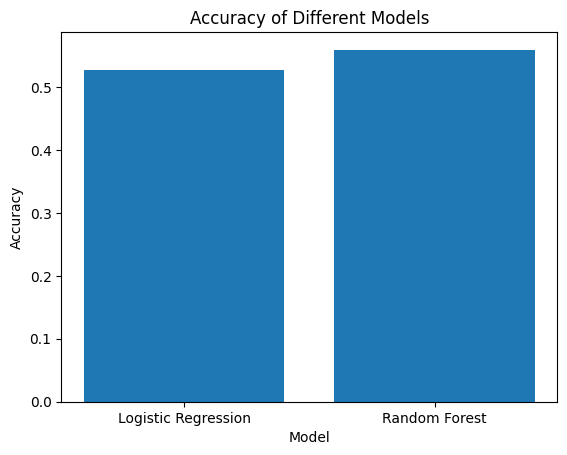

In [ ]:
plt.bar(['Logistic Regression', 'Random Forest'], [accuracy, accuracy_rf])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()


In [ ]:
# import requirements for support vector machine and apply svm for dataset1

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset1.loc[:, dataset1.columns.str.startswith("token_")], dataset1['label'], test_size=0.25)

# Create a support vector machine model
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)


Accuracy: 0.5598765432098766


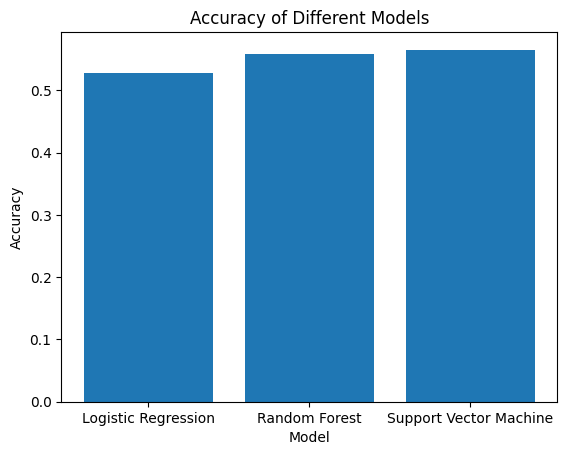

In [ ]:
plt.bar(['Logistic Regression', 'Random Forest', 'Support Vector Machine'], [accuracy, accuracy_rf, accuracy_svm])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()


Epoch 1/10
152/152 [==============================] - 2s 4ms/step - loss: 0.6909 - accuracy: 0.5239
Epoch 2/10
152/152 [==============================] - 1s 4ms/step - loss: 0.6806 - accuracy: 0.5626
Epoch 3/10
152/152 [==============================] - 1s 4ms/step - loss: 0.6747 - accuracy: 0.5790
Epoch 4/10
152/152 [==============================] - 1s 4ms/step - loss: 0.6686 - accuracy: 0.5972
Epoch 5/10
152/152 [==============================] - 1s 4ms/step - loss: 0.6601 - accuracy: 0.6037
Epoch 6/10
152/152 [==============================] - 1s 3ms/step - loss: 0.6489 - accuracy: 0.6163
Epoch 7/10
152/152 [==============================] - 1s 4ms/step - loss: 0.6373 - accuracy: 0.6326
Epoch 8/10
152/152 [==============================] - 1s 4ms/step - loss: 0.6254 - accuracy: 0.6431
Epoch 9/10
152/152 [==============================] - 1s 4ms/step - loss: 0.6094 - accuracy: 0.6667
Epoch 10/10
51/51 [==============================] - 0s 3ms/step
Accuracy: 0.5308641975308642


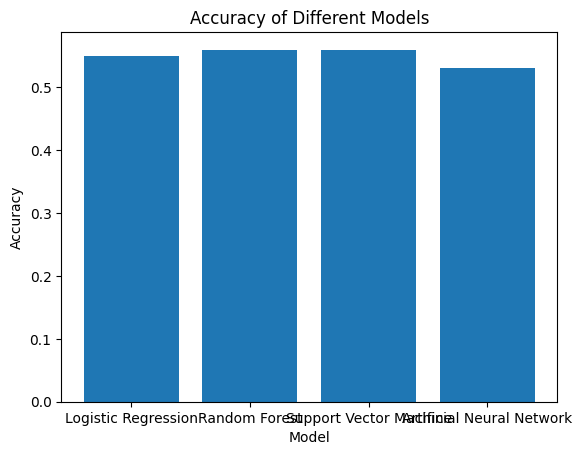

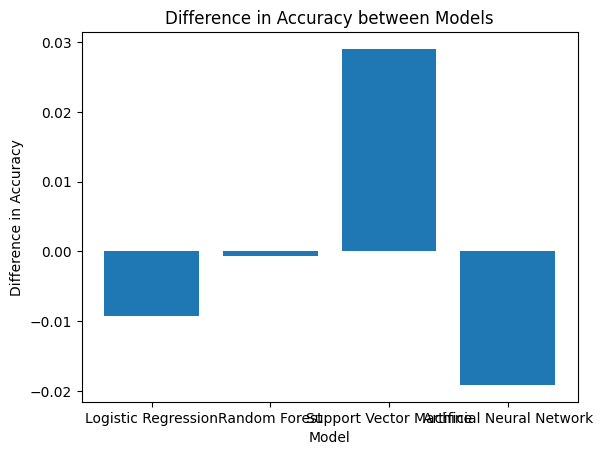

In [ ]:
# Apply ANN

# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset1.loc[:, dataset1.columns.str.startswith("token_")], dataset1['label'], test_size=0.25, random_state=42)

# Create an artificial neural network model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model's performance
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
accuracy_ann = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_ann)


plt.bar(['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Artificial Neural Network'], [accuracy, accuracy_rf, accuracy_svm, accuracy_ann])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()


plt.bar(['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Artificial Neural Network'], [accuracy - accuracy_rf, accuracy_rf - accuracy_svm, accuracy_svm - accuracy_ann, accuracy_ann - accuracy])
plt.xlabel('Model')
plt.ylabel('Difference in Accuracy')
plt.title('Difference in Accuracy between Models')
plt.show()


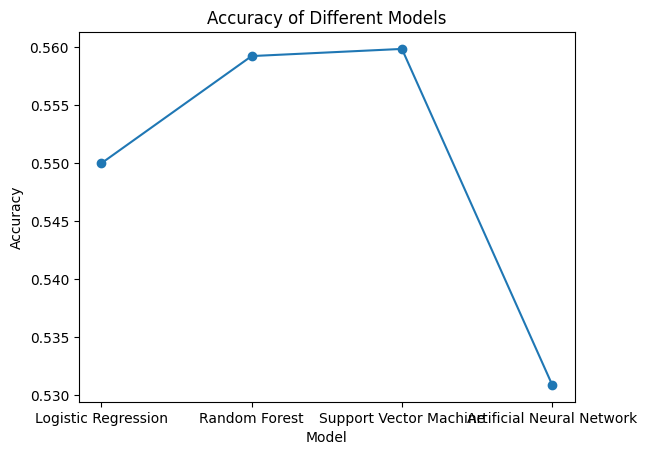

In [ ]:
# Differences in accuracies
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Artificial Neural Network']
accuracies = [accuracy, accuracy_rf, accuracy_svm, accuracy_ann]

plt.plot(models, accuracies, marker='o', linestyle='-')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()
